# Imports

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Functions

In [23]:
def exponential(x, a, b):
    return a * np.exp(x / b)

# Data

In [96]:
# the following arrays report the total number of COVID-19 cases in Italy and Spain

italy = [229, 323, 470, 665, 889, 1128, 1701, 
         2036, 2502, 3089, 3858, 4636, 5883, 7375,
         9172, 10149, 12462, 15113, 17660] #start on Feb 24

spain = [25, 33, 58, 84, 
         120, 165, 228, 282, 401, 525, 674, 
         1231, 1695, 2277, 3146, 5232] #start on Feb 27

# Dummy Exponential Fit: Italy vs Spain

In [97]:
n_days = max(len(italy), len(spain))
x_italy = np.arange(n_days)
x_spain = x_italy[3:]

## Fit

In [102]:
#fit with a simple exponential, y_error proportional to n^0.5
popt_italy, pcov_italy = curve_fit(exponential, x_italy, italy, sigma=np.sqrt(italy))
popt_spain, pcov_spain = curve_fit(exponential, x_spain, spain, sigma=np.sqrt(spain))

In [103]:
params = {'axes.labelsize': 'large'}
plt.rcParams.update(params)

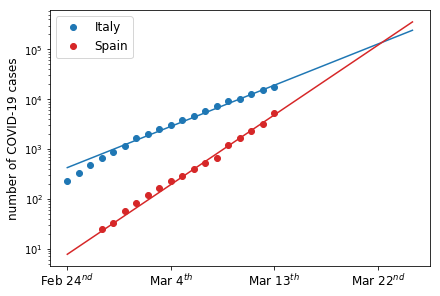

In [110]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x_italy, italy, 'o', label='Italy')
ax.plot(x_spain, spain, 'o', color='tab:red', label='Spain')

xx = np.linspace(0, 30, 2000)
ax.plot(xx, exponential(xx, *popt_italy), color='tab:blue')
ax.plot(xx, exponential(xx, *popt_spain), color='tab:red')

#plot decoration
ax.set_yscale('log')
ax.set_ylabel('number of COVID-19 cases')
#ax.set_xlabel('days')
xticks = [0, 9, 18, 27]
xtickslabels = ['Feb 24$^{nd}$', 'Mar 4$^{th}$', 'Mar 13$^{th}$', 'Mar 22$^{nd}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, fontsize='large')
ax.legend(fontsize='large')

fig.savefig('plot/totale_casi.png', dpi = 300)